In [1]:
#loading data
import pandas as pd
df = pd.read_csv("bitcoin_price.csv")

In [2]:
#retriving the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  2793 non-null   object 
 1   time    2793 non-null   int64  
 2   open    2793 non-null   float64
 3   close   2793 non-null   float64
 4   high    2793 non-null   float64
 5   low     2793 non-null   float64
 6   volume  2793 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 152.9+ KB


In [3]:
#dropping the columns
df = df.drop(columns=['symbol'])

In [4]:
# Import  libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# X contains all features except the 'close' column
X = df.drop('close', axis=1)

# y contains the target variable, which is the 'close' column
y = df['close']

# Split the data into training and testing sets
# random_state is set to 42 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2793 non-null   int64  
 1   open    2793 non-null   float64
 2   close   2793 non-null   float64
 3   high    2793 non-null   float64
 4   low     2793 non-null   float64
 5   volume  2793 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 131.1 KB


In [6]:
# Importing the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Creating an instance of the LinearRegression model
lr = LinearRegression()

# Training the model using the training data
lr.fit(x_train, y_train)

# Printing the R^2 score  on the training set
print(lr.score(x_train, y_train))

# Printing the R^2 score  on the testing set
print(lr.score(x_test, y_test))


0.9994787200835562
0.9995235787716003


In [7]:
# Print the coefficients of the linear regression model
print(lr.coef_)
# Print the intercept of the linear regression model
print(lr.intercept_)

[-1.63543444e-10 -4.66527583e-01  8.34286397e-01  6.33348552e-01
 -1.07967231e-04]
232.70792466719422


<Axes: >

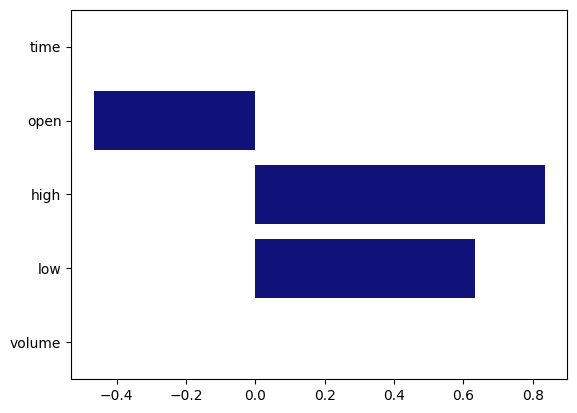

In [8]:
#importing the seaborn library and ploting graph
import seaborn as sns
sns.barplot(x=lr.coef_, y=x_train.columns, color='darkblue')

<Axes: xlabel='open', ylabel='close'>

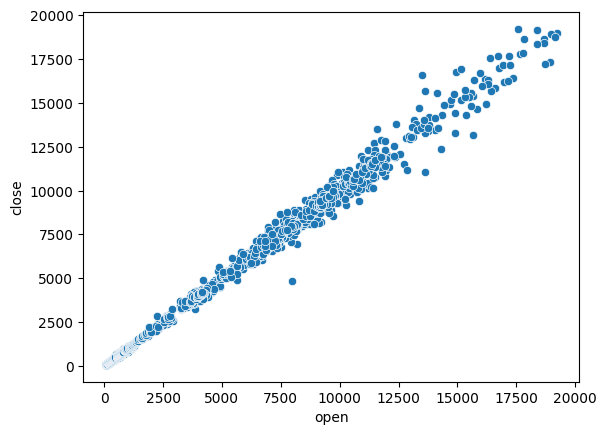

In [9]:
# Creating a scatter plot to visualize the relationship between 'open' and 'close' prices
sns.scatterplot(x=df['open'], y=df['close'])

In [10]:
# Importing the statsmodels library for statistical modeling

import statsmodels.api as sm
sm_lr = sm.OLS(y_train, sm.add_constant(x_train.astype(float)))
# Fitting the OLS regression model to the training data
res = sm_lr.fit()
res = sm_lr.fit()
# Printing the summary statistics of the fitted regression model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.007e+05
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:18:15   Log-Likelihood:                -12576.
No. Observations:                2094   AIC:                         2.516e+04
Df Residuals:                    2088   BIC:                         2.520e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.7079     82.724      2.813      0.005      70.477     394.939
time       -1.635e-10   5.78e-11     -2.830      0.005   -2.77e-10   -5.02e-11
open          -0.4665      0.014    -34.262      0.000      -0.493      -0.440
high           0.8343      0.013     65.467      0.000       0.809       0.859
low            0.6333      0.012     54.182      0.000       0.610       0.656
volume        -0.0001      0.000     -1.025      0.305      -0.000    9.86e-05
==============================================================================
Omnibus:                      576.286   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54437.205
Skew:                           0.080   Prob(JB):                         0.00
Kurtosis:                      27.978   Cond. No.                     5.73e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Importing the LassoCV (Lasso Cross-Validation) model from the sklearn.linear_model module
from sklearn.linear_model import LassoCV
l1_lr = LassoCV()
#train and fit regression
l1_lr.fit(x_train, y_train)

LassoCV()

In [12]:
# Utilizing scikit-learn's KNeighborsRegressor to fit a k-nearest neighbors regression model to the training data (x_train, y_train),
# and evaluating its performance by printing the R-squared scores on both the training and testing data (x_test, y_test).

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))

0.9979964565863325
0.9964060448013227


In [13]:
from sklearn.metrics import r2_score
r2_score(y_train, [y_train.mean()] * y_train.shape[0])

0.0

In [14]:
# Calculating the R-squared score for the Lasso regression model (l1_lr) on the testing data (x_test, y_test)
r2 = r2_score(y_test, l1_lr.predict(x_test))
n, p = x_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
#printign r2 values
print(r2)
print(adj_r2)

0.6935431028317874
0.69133201410763


In [15]:
#installin the regscorepy
!pip install RegscorePy
from RegscorePy.aic import aic
aic(y_train, l1_lr.predict(x_train), x_train.shape[1])

32673.93474336512

In [16]:
#importing regscorepy
from RegscorePy.aic import aic
aic(y_train, l1_lr.predict(x_train), x_train.shape[1])

32673.93474336512

In [17]:
# Importing the mean_squared_error function from the sklearn.metrics module
from sklearn.metrics import mean_squared_error as mse

# Calculating the mean squared error (MSE) between the actual target values (y_test) and the predicted values from the Lasso regression model (l1_lr) on the testing data (x_test)
mse(y_test, l1_lr.predict(x_test))


5475422.542392582

In [18]:

from sklearn.metrics import mean_absolute_error as mae
mae(y_test, l1_lr.predict(x_test))

1791.1082970207628

Text(0, 0.5, 'residuals')

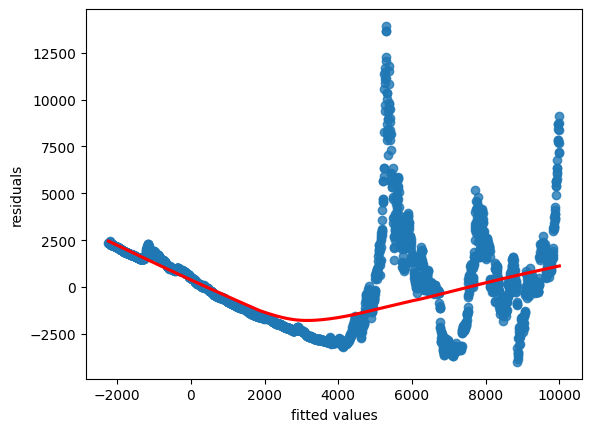

In [19]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Generating predictions using the Lasso regression model (l1_lr) on the DataFrame (df) after dropping the 'close' column
predictions = l1_lr.predict(df.drop('close', axis=1))

# Calculating residuals by subtracting the predicted values from the actual 'close' prices
residuals = df['close'] - predictions

# Creating a scatter plot of residuals against fitted values with a locally weighted scatterplot smoothing (lowess) curve
sns.regplot(x=predictions,
            y=residuals,
            lowess=True,
            line_kws={'color': 'red'})

# Adding labels to the x and y axes
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')



In [20]:
for i in range(1, 11):
 print(y_train.autocorr(i))

0.037725255155658007
0.017665954466102012
0.020235423944472888
0.024967840441470025
-0.045582739283086315
0.026306815136117892
0.03455784101905568
0.04965501097620079
-0.02043459961261199
0.036940862579722275


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

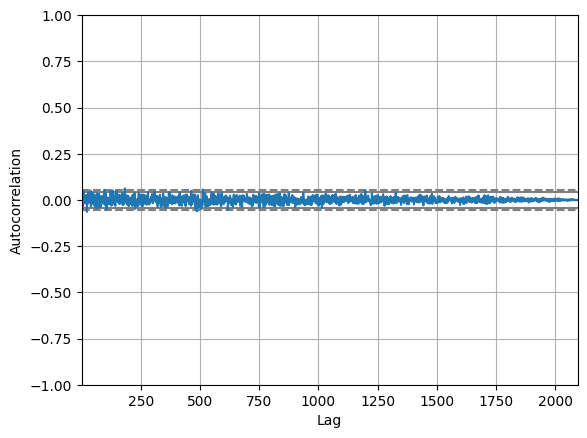

In [21]:
#ploting the graoh
pd.plotting.autocorrelation_plot(y_train)

C:\Users\sai chinna\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'sqrt(standardized residuals)')

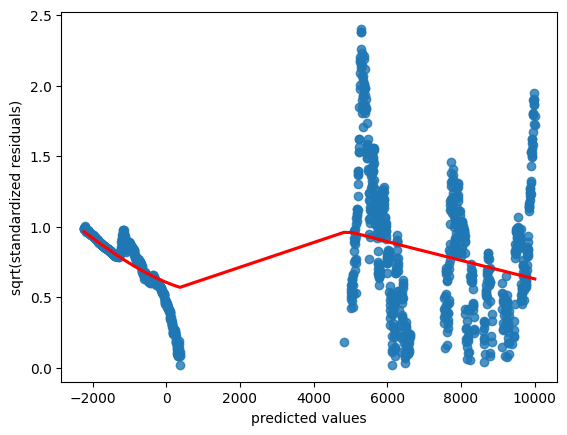

In [22]:
import numpy as np
standardized_residuals = np.sqrt(residuals / residuals.std())
sns.regplot(x=predictions,
            y=standardized_residuals,
            lowess=True,
         line_kws={'color': 'red'})
plt.xlabel('predicted values')
plt.ylabel('sqrt(standardized residuals)')

In [23]:
# Converting the 'time' column to datetime format with milliseconds precision
df['time'] = pd.to_datetime(df['time'], unit='ms')

# Setting the 'time' column as the index of the DataFrame
df.set_index('time', inplace=True)

# Selecting only the 'close' and 'volume' columns and updating the DataFrame
df = df[['close', 'volume']]


In [24]:
 df['close_1d_future'] = df['close'].shift(-1)
 df.dropna(inplace=True)

In [25]:
features = df.drop('close_1d_future', axis=1)
targets = df['close_1d_future']
train_idx = int(0.75 * df.shape[0])
x_train = features.iloc[:train_idx]
y_train = targets.iloc[:train_idx]
x_test = features.iloc[train_idx:]
y_test = targets.iloc[train_idx:]


In [26]:

from sklearn.model_selection import TimeSeriesSplit
 l1_lr = LassoCV(cv=TimeSeriesSplit())
 l1_lr.fit(x_train, y_train)
 print(mae(y_train, l1_lr.predict(x_train)))
 print(mae(y_test, l1_lr.predict(x_test)))

85.63489721292613
220.80838114586564


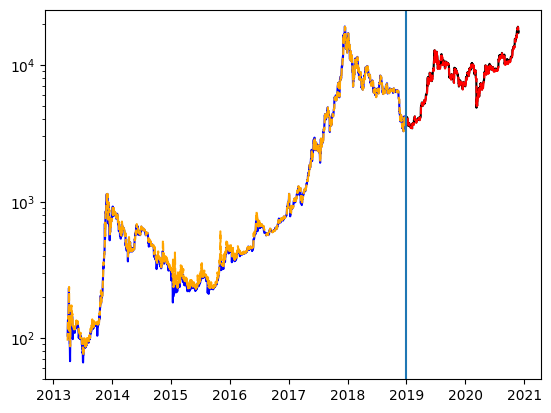

In [27]:
 # Using LassoCV with TimeSeriesSplit cross-validation to fit a Lasso regression model to the training data,
# then evaluating its performance by printing the mean absolute error (MAE) on both the training and testing data.

    train_dates = df.index[:train_idx]
 test_dates = df.index[train_idx:]
 train_predictions = l1_lr.predict(x_train)
 test_predictions = l1_lr.predict(x_test)
 plt.plot_date(train_dates, y_train, fmt='-', color='b')
 plt.plot_date(train_dates, train_predictions, fmt='--', color='orange')
 plt.plot_date(test_dates, y_test, fmt='-', color='k')
 plt.plot_date(test_dates, test_predictions, fmt='--', color='r')
 plt.axvline(df.index[train_idx])
 plt.yscale('log')

In [28]:
 df.reset_index(inplace=True)

In [29]:
 df.drop('close_1d_future', axis=1, inplace=True)

In [30]:
 df.rename(columns={'close': 'y', 'time': 'ds'}, inplace=True)

In [32]:
!pip install Prophet

  Obtaining dependency information for Prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e0/e2/2ff5e8e06734c1f6f3933274d1eed1ea9e0904bf7a795869a417f5d3de41/cmdstanpy-1.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/f0/64/6087fc1024f80fe30ca4188c82b8c533ea06f629632f78b8e45b4129df33/holidays-0.46-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/55/35/076a5ff427a47613581f6bd7acebfa8d49046a1b78132

In [34]:
 from prophet import Prophet
 m = Prophet()
 m.fit(df)

20:20:31 - cmdstanpy - INFO - Chain [1] start processing
20:20:32 - cmdstanpy - INFO - Chain [1] done processing


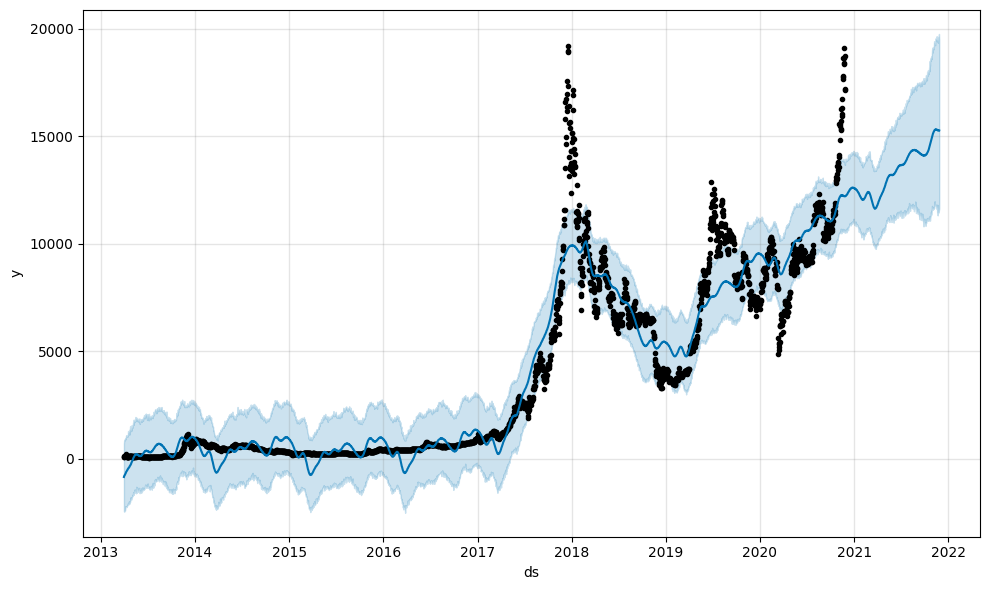

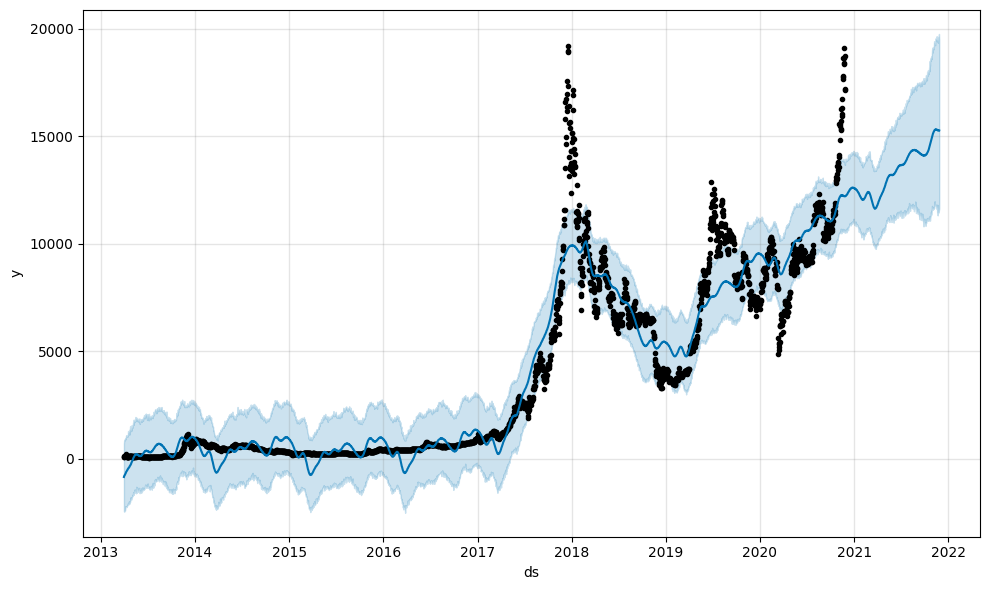

In [35]:
 future = m.make_future_dataframe(periods=365)
 forecast = m.predict(future)
 m.plot(forecast)

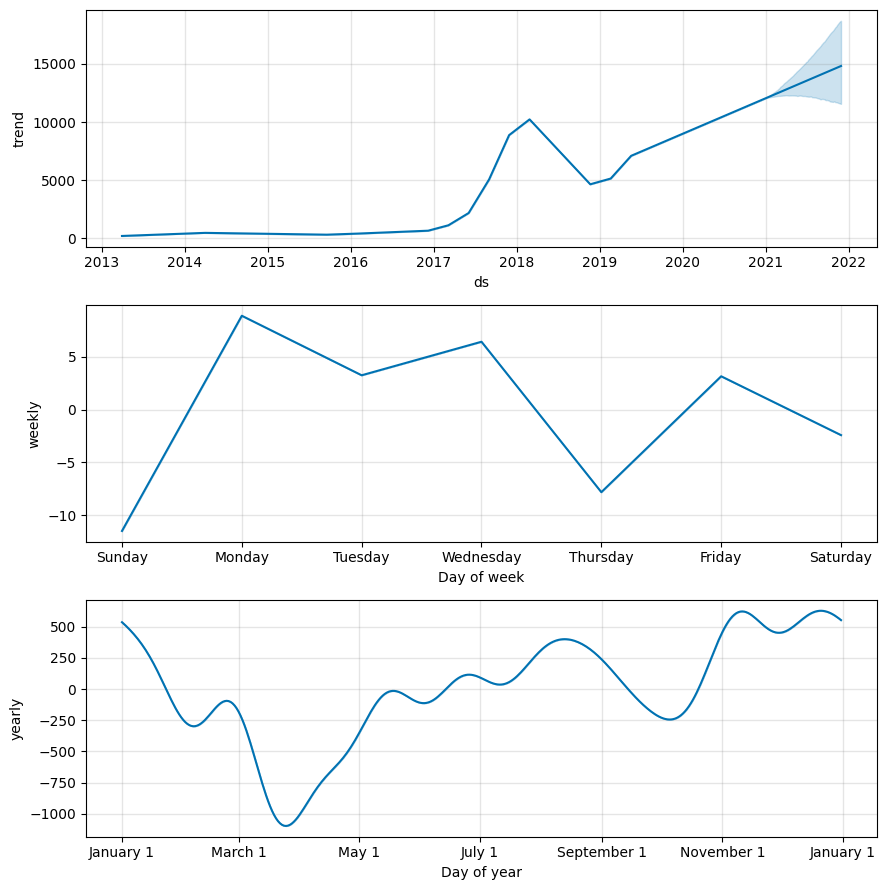

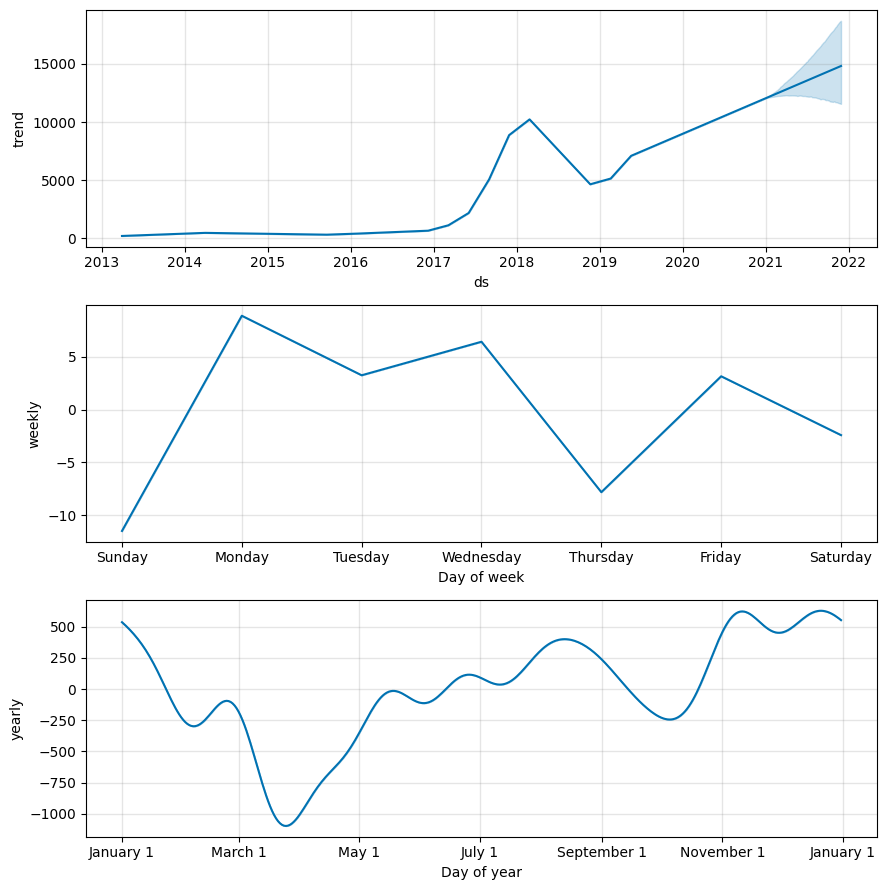

In [36]:
 m.plot_components(forecast)